In [173]:

# Import dependencies
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from datetime import datetime as dt 
pd.set_option('max_colwidth', 400)

### Extract the Data

In [174]:
# Read the 'Imports by selected importing countries' data into a Pandas DataFrame
imports_df = pd.read_excel(r'cleaned_resources/Imports.xlsx', engine='openpyxl')
imports_df = imports_df.drop(labels=[35,36,37,38], axis =0)
imports_df.head()

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Austria,1879.717004,2058.271005,2206.416005,1836.489002,1417.214004,1231.436001,1210.466006,1294.203405,1293.354106,...,1369.200299,1452.492905,1558.609366,1554.926951,1525.081080,1513.390285,1494.938560,1459.911532,1429.406831,1447.513664
1,Belgium,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5923.729993,5828.442382,5668.231844,5502.143640,5211.749274,5533.514206,6052.170163,5677.379139,5742.253404,6198.896527
2,Belgium_Luxembourg,2014.954017,1746.225019,1827.851020,2063.260029,2262.473036,2401.498025,2525.823622,2544.379319,3579.677916,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Bulgaria,268.182998,200.220001,182.231012,397.443006,462.668007,515.418008,272.159995,294.154003,342.122004,...,528.372082,481.510209,559.825066,609.486668,620.708966,681.756589,779.160013,706.882517,737.243983,784.896715
4,Croatia,0.000000,0.000000,168.190005,162.774001,193.450002,320.132006,321.835998,385.297004,339.051001,...,393.825469,390.873959,384.490360,412.849422,419.673550,437.201445,478.666658,439.074412,445.513611,466.417527


In [175]:
imports_df.describe()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
count,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,...,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000
mean,2118.033089,2036.616947,2263.304349,2203.416191,2143.554816,2067.740216,2224.389904,2316.094588,2364.760087,2440.910922,...,3118.440402,3194.642667,3233.457054,3312.312942,3429.361176,3467.938305,3646.638659,3601.809997,3712.775354,3855.554183
std,4239.120777,4058.900315,4483.886846,4041.310175,3630.924669,3648.150931,4025.219110,4167.295406,4247.436584,4525.537817,...,5365.958703,5606.222254,5673.554188,5755.549748,5898.834217,5852.974287,6112.745038,6140.619988,6130.456444,6424.192940
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.356999,8.037002,102.575501,131.380000,148.203001,142.201001,162.097559,178.880763,179.726216,196.010315,...,362.464280,358.201346,360.583241,395.511337,416.358103,432.479322,472.109840,435.763377,489.240087,490.981447
50%,573.974000,525.274000,603.208022,668.055998,771.221998,633.168003,742.959204,727.290404,761.586804,789.977602,...,1010.442040,952.366595,1075.842247,1062.681612,1059.749497,1043.856962,1133.698883,1093.954625,1160.023658,1219.764763
75%,1947.335511,1902.248012,2017.133513,1949.874516,2077.882522,2086.103567,2224.948841,2398.730693,2577.504419,2484.569621,...,3717.085511,3793.524595,3834.399703,3806.442917,4167.358937,4443.136986,4916.871818,5028.389220,5403.989558,5454.193441
max,21006.786010,19839.630013,22939.033012,19328.721012,16171.245016,17106.857014,19444.533118,20342.745825,21030.401133,22746.432338,...,24378.013044,26093.394757,26056.162574,27015.540160,27565.497624,27707.663702,28837.837837,29487.886464,28918.207055,30854.072649


In [176]:
# imports_df = pd.melt(imports_df, id_vars = "Country", var_name= "Year", value_name="Import_Volume")
# imports_df

In [177]:
# Export the DataFrame as a CSV file. 
imports_df.to_csv(("Resources/imports.csv"))

In [178]:
imports_df["Total_imports_per_Country"]=imports_df.sum(axis=1)
imports_df.sort_values(by="Total_imports_per_Country", ascending=False)

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Total_imports_per_Country
34,United States of America,21006.786010,19839.630013,22939.033012,19328.721012,16171.245016,17106.857014,19444.533118,20342.745825,21030.401133,...,26093.394757,26056.162574,27015.540160,27565.497624,27707.663702,28837.837837,29487.886464,28918.207055,30854.072649,708460.333697
11,Germany,13670.946005,13228.851004,13788.554006,14107.003006,13583.215008,12851.835005,13507.128909,13905.184716,13739.568415,...,20926.404580,21816.212008,21174.306912,22077.693664,21316.211718,22368.390781,21764.783862,22147.181429,22431.905432,524689.623950
15,Italy,5241.831000,4630.023000,4594.727000,5593.705001,5553.766003,5387.861005,5607.987206,5742.631909,5889.393510,...,8355.342574,8690.869716,8822.544900,9349.822423,9328.193272,10224.188825,10020.273316,10639.354618,10913.757224,221201.338899
28,Japan,5329.750004,5510.469001,5325.615998,5691.120004,6217.151005,5489.087004,5994.113004,5921.415001,6026.965002,...,7543.855892,7024.859940,8381.262867,7656.982990,8063.398022,8026.154485,7646.636781,7539.981823,8039.677993,207046.557925
10,France,6301.221035,6552.709041,6612.056041,6334.468044,6368.662042,6213.680045,6659.513448,6703.985251,6576.022652,...,6991.820108,6841.135557,6713.104855,7112.306134,6808.566640,6737.782710,6966.514663,7624.019021,7992.905036,199539.463786
26,Spain,3053.251000,2969.543000,3414.290003,2813.088000,3028.425000,3145.866003,3515.277508,3776.560607,3717.653605,...,4820.907712,5094.020070,5136.943264,5405.557639,5428.565170,5660.146938,5414.229253,5673.000674,5983.510850,130676.543928
33,United Kingdom,2898.298008,2805.914005,3088.172009,3196.981011,3465.860012,2806.723015,2903.453114,2929.338015,3142.408017,...,4183.229880,4126.053681,4206.090925,4318.695591,4895.407288,5052.293459,4989.037899,5687.859741,5554.363879,112193.593989
1,Belgium,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5828.442382,5668.231844,5502.143640,5211.749274,5533.514206,6052.170163,5677.379139,5742.253404,6198.896527,104007.999890
20,Netherlands,3128.150018,3120.774019,3204.952020,2803.729010,2799.881022,2910.366023,3083.957321,2923.772828,2862.048324,...,2678.334327,2729.760788,3406.794908,4016.022282,4176.235826,4781.450177,5067.740540,5520.437554,5354.023003,99189.063249
30,Russian Federation,0.000000,0.000000,1381.858008,1794.946013,1725.730019,1728.144014,1127.972006,2185.288451,1731.917618,...,4217.682792,4174.744623,4410.193461,4746.949627,4710.038146,5232.881169,5467.782682,5287.541562,5916.632578,95517.847689


In [179]:
total_country_imports_df = imports_df.iloc[:,[0,31]]
total_country_imports_df.sort_values(by="Total_imports_per_Country", ascending=False)


,Country,Total_imports_per_Country
34,United States of America,708460.333697
11,Germany,524689.623950
15,Italy,221201.338899
28,Japan,207046.557925
10,France,199539.463786
26,Spain,130676.543928
33,United Kingdom,112193.593989
1,Belgium,104007.999890
20,Netherlands,99189.063249
30,Russian Federation,95517.847689


In [180]:
# Read the 'Exports of all forms of coffee by all exporting countries' data into a Pandas DataFrame
exports_df = pd.read_excel(r'cleaned_resources/Exports_calendar_year.xlsx', engine='openpyxl')
exports_df = exports_df.drop(labels=[55,56], axis =0)
exports_df.head()

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Angola,84.3500,70.501000,80.250000,38.878000,8.3020,40.559000,51.831000,50.494000,53.929000,...,4.370000,7.575000,8.375000,5.520000,9.375000,10.515000,10.945000,9.055000,9.323397,23.357178
1,Bolivia (Plurinational State of),156.4420,73.523000,96.204000,47.319000,84.3210,93.958000,123.445000,110.955000,97.039000,...,78.268006,74.308883,62.675780,54.850533,61.751267,30.280158,22.456342,26.119992,22.459634,20.341955
2,Brazil,16935.7876,21182.761402,18790.719202,17837.747999,17273.1476,14468.432201,15250.609002,16801.260005,18144.388334,...,33166.641590,33806.009328,28549.425891,31650.562945,37335.172825,37562.846747,34269.150253,30924.567849,35637.358589,40697.863709
3,Burundi,584.7730,687.851000,645.858000,417.609000,507.8030,528.202000,224.076000,528.764000,373.841000,...,307.118958,217.845799,392.006917,194.715883,252.178000,230.188550,204.270831,168.876264,201.725236,292.887291
4,Cameroon,2611.2590,1752.179000,1645.851000,704.530000,545.8890,407.269000,563.549000,1368.030000,745.718000,...,793.845667,490.283067,621.812800,271.949217,375.033867,390.142717,281.128967,245.017117,287.415250,249.902400


In [181]:
exports_df.describe()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
count,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,...,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000
mean,1466.812229,1380.785062,1423.622495,1366.660824,1285.633172,1234.116613,1412.176463,1462.530807,1458.968159,1566.235830,...,1764.480817,1857.907962,1971.703451,1973.941079,2100.868208,2116.288217,2206.079286,2173.065107,2301.777099,2394.437514
std,3054.785240,3365.274742,3385.937192,3086.731544,2865.055984,2451.790920,2723.410372,2935.238532,3061.103892,3577.090547,...,4943.570206,5202.394542,5054.078282,5218.141862,6221.546671,6063.416622,6273.139933,5679.146109,6545.861001,6789.054143
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.013083,0.000000
25%,67.175000,65.974000,38.679001,36.818000,30.884000,39.355500,27.898500,37.074725,30.287000,37.171000,...,7.325208,8.812053,7.725363,5.927805,10.775443,10.792005,11.084499,9.643703,8.528365,8.245668
50%,262.502000,154.834000,165.976000,218.284000,153.000000,200.316000,156.468000,202.778000,214.272000,300.794000,...,95.194000,131.665067,137.383017,70.239917,75.027000,67.686005,75.795840,57.536183,111.044350,58.493450
75%,1759.404500,1417.170500,1328.863000,1302.788500,1416.868000,1495.010000,1758.802500,1507.881500,1516.607500,1569.117500,...,1200.767672,1355.384867,1476.629053,1303.038748,1169.041841,998.619408,1070.054330,824.360489,1038.946140,1054.179324
max,16935.787600,21182.761402,18790.719202,17837.747999,17273.147600,14468.432201,15250.609002,16801.260005,18144.388334,23149.203804,...,33166.641590,33806.009328,28549.425891,31650.562945,37335.172825,37562.846747,34269.150253,30924.567849,35637.358589,40697.863709


In [182]:
# exports_df=pd.melt(exports_df, id_vars = "Country", var_name= "Year", value_name="Export_Volume")
# exports_df

In [183]:
# Export the DataFrame as a CSV file. 
exports_df.to_csv(("Resources/exports.csv"))

In [184]:
exports_df["Total_exports_per_Country"]=exports_df.sum(axis=1)
exports_df.sort_values(by="Total_exports_per_Country", ascending=False)

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Total_exports_per_Country
2,Brazil,16935.787600,21182.761402,18790.719202,17837.747999,17273.147600,14468.432201,15250.609002,16801.260005,18144.388334,...,33806.009328,28549.425891,31650.562945,37335.172825,37562.846747,34269.150253,30924.567849,35637.358589,40697.863709,786432.338399
51,Viet Nam,1145.234001,1200.952000,1937.611000,2071.837000,2720.911000,3546.405000,3779.415000,6177.834000,6466.712000,...,17717.394731,22919.663832,19717.764414,26097.144160,21943.502175,29721.290533,25092.158683,31385.065579,27400.161817,415409.004292
6,Colombia,13943.870000,12599.184998,16564.370001,13568.362004,11768.089000,9814.197000,10588.430998,10918.863002,11259.928999,...,7733.625254,7170.203291,9669.907367,10954.408357,12716.384670,12831.390727,12984.595747,12807.972625,13672.225599,331310.995174
25,Indonesia,6903.226999,6170.796000,4603.696000,5662.094001,4604.629999,3946.585001,6440.280000,5755.078000,5598.031999,...,3919.891883,8205.740826,9254.807331,6174.809713,8378.687596,6545.392045,8197.573974,4538.839055,6333.872889,176797.246233
24,India,1979.147999,1727.358999,1816.341000,2101.593000,2496.085000,2467.257001,3103.176000,2640.111001,3486.830003,...,5414.010577,5043.961929,5032.638529,5130.914270,5262.293887,6086.119737,6541.501049,5967.224604,6027.861152,115566.531524
19,Guatemala,3240.141000,2831.985000,3327.988000,3750.687000,3274.069000,3700.872001,3978.998000,4243.882000,3541.853000,...,3696.825498,3750.112536,3575.011397,3043.438535,2960.862008,2991.120758,3382.666191,3327.489656,3613.187991,107738.038801
23,Honduras,1735.093000,1444.363000,1960.071000,1705.317000,1718.185000,1795.963000,2059.760000,1722.482000,2329.274000,...,3947.141151,5507.984939,4185.118924,4251.826667,5029.667006,5305.953308,7340.843952,7143.884471,6764.564607,99415.323794
49,Uganda,2352.680000,2095.093000,1961.034000,1829.081000,3368.765000,3079.261000,4654.503000,3501.942000,3286.012000,...,3142.011000,2685.237000,3671.879000,3442.351000,3595.607000,3543.097000,4774.033000,4223.182000,4526.143000,93869.034000
32,Mexico,3683.104002,3530.820002,3332.041000,3263.616001,2789.046000,3626.491999,4633.497001,4502.424001,3399.026001,...,2906.517574,3556.455805,3132.049713,2479.526809,2457.996501,2232.913073,2910.649964,2888.140482,2626.984856,93798.782337
39,Peru,1105.078000,1041.867000,1061.043000,775.000000,1057.017000,1760.467000,1679.374000,1647.733000,1949.254000,...,4697.069665,4310.351922,3736.075980,2719.889850,2789.839140,3959.583593,3945.823228,4063.938661,3771.945882,81732.368064


In [185]:
total_country_exports_df = exports_df.iloc[:,[0,31]]
total_country_exports_df.sort_values(by="Total_exports_per_Country", ascending=False)

,Country,Total_exports_per_Country
2,Brazil,786432.338399
51,Viet Nam,415409.004292
6,Colombia,331310.995174
25,Indonesia,176797.246233
24,India,115566.531524
19,Guatemala,107738.038801
23,Honduras,99415.323794
49,Uganda,93869.034000
32,Mexico,93798.782337
39,Peru,81732.368064


In [186]:
# Read the 'Prices paid to growers in exporting countries' data into a Pandas DataFrame
prices_paid_to_growers_df = pd.read_excel(r'cleaned_resources/Prices_paid_to_growers.xlsx', engine='openpyxl')
prices_paid_to_growers_df = prices_paid_to_growers_df.drop(labels=[62,63,64,65,66,67], axis =0)
prices_paid_to_growers_df.head()

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Colombia,69.5230,67.1251,54.5709,50.1234,85.9942,99.6231,93.5556,133.1672,102.0805,...,180.5484,239.6763,166.6921,113.9086,159.7125,119.4042,123.5571,125.7612,113.5179,108.6836
1,Kenya,60.5721,50.6778,28.9495,47.6419,152.6058,140.1651,110.0360,183.9967,179.8972,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2,Tanzania,40.8183,49.5039,49.1581,38.2833,62.1553,86.7599,62.5345,118.5236,90.7025,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
3,Bolivia (Plurinational State of),51.7802,52.4230,43.5276,27.3283,79.9150,76.9867,57.1799,100.0689,131.0938,...,0.0000,0.0000,225.6445,201.9723,239.2465,234.7937,271.7944,471.6169,455.1460,858.2941
4,Burundi,58.0195,55.0206,59.2340,58.2708,60.6823,56.6854,51.9721,52.7855,52.2187,...,85.6928,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


In [187]:
prices_paid_to_growers_df.describe()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,...,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,42.238469,39.188726,36.189366,39.416869,66.952137,74.710003,60.817218,73.057215,64.004679,47.846256,...,51.449581,63.850426,63.880268,50.054048,49.600894,42.526192,38.923447,43.329648,34.251476,33.013494
std,35.347178,38.496581,32.660969,41.779218,55.121073,52.615158,52.974193,59.473642,48.680089,41.203140,...,62.391468,82.697748,73.762870,58.549820,65.290132,60.855967,61.455660,79.450026,68.823819,112.201982
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.097325,17.969525,20.883700,17.618975,26.435225,42.904050,32.371800,38.016075,32.049275,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,36.832700,31.496900,31.909700,34.940800,68.064450,73.125050,59.705100,60.909650,61.716200,46.566550,...,25.969100,9.217300,46.903350,27.703750,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,60.051400,54.446900,47.011650,52.600050,88.303850,99.251275,81.335525,111.381075,94.750825,72.409375,...,85.634550,107.056600,103.012225,91.439600,92.004500,76.809100,76.523500,74.929750,66.158150,45.335200
max,171.551300,227.424100,182.511500,255.535000,290.598600,284.244800,332.109100,286.780700,215.449900,188.571100,...,286.819700,302.694800,301.444200,221.963800,239.246500,235.713800,271.794400,471.616900,455.146000,858.294100


In [188]:
# prices_paid_to_growers_df=pd.melt(prices_paid_to_growers_df, id_vars = "Country", var_name= "Year", value_name="Growers_Price")
# prices_paid_to_growers_df

In [189]:
# Export the DataFrame as a CSV file. 
prices_paid_to_growers_df.to_csv(("Resources/prices_paid_to_growers.csv"))

In [190]:
# Read the 'Retail prices of roasted coffee in selected importing countries' data into a Pandas DataFrame
retail_prices_df = pd.read_excel(r'cleaned_resources/Retail_prices.xlsx', engine='openpyxl')
retail_prices_df = retail_prices_df.drop(labels=[28,29,30, 31,32,33,34], axis =0)
retail_prices_df.head()

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Austria,4.90,4.57,4.99,4.97,4.58,5.18,5.42,4.37,3.97,...,6.69,8.32,8.38,8.62,8.63,7.44,5.64,6.22,6.63,6.166070
1,Belgium,3.27,2.92,3.05,2.78,3.42,4.88,4.04,3.98,4.19,...,5.18,6.48,6.20,6.24,0.00,0.00,0.00,0.00,0.00,0.000000
2,Bulgaria,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,3.62,4.16,3.44,3.59,3.75,3.45,3.79,4.64,4.58,4.208544
3,Cyprus,2.83,2.80,2.87,2.60,3.18,4.26,4.13,4.04,4.61,...,5.21,6.06,6.36,6.47,6.48,5.30,5.30,5.50,5.79,5.393971
4,Czechia,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4.31,5.10,...,5.01,6.58,7.13,7.00,6.61,5.75,6.14,6.58,7.27,6.697826


In [191]:
retail_prices_df.describe()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
count,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,...,28.00000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000
mean,2.747857,2.721429,2.748214,2.591786,3.112143,4.522857,4.256786,4.589286,4.547857,4.481071,...,5.77000,6.739286,6.662857,6.568929,6.328929,5.586071,5.412143,5.703929,5.472143,4.775941
std,2.876584,3.013820,3.110145,3.123625,3.351038,3.977243,3.855719,3.618107,3.463231,3.342586,...,2.70972,3.433404,3.443912,3.511036,3.919655,3.516678,3.213331,3.363649,3.929225,3.955821
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.62000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,2.767500,2.415000,3.530000,3.585000,3.220000,...,4.23000,5.167500,4.785000,4.717500,4.407500,3.880000,3.775000,4.175000,4.012500,3.368584
50%,3.005000,2.865000,2.725000,2.465000,3.220000,4.495000,4.085000,4.075000,4.005000,3.530000,...,5.01500,6.060000,6.135000,5.920000,5.725000,5.340000,4.995000,5.190000,5.330000,4.601180
75%,3.855000,3.712500,3.842500,3.515000,4.230000,5.595000,4.962500,4.752500,4.912500,4.667500,...,6.44000,7.765000,7.652500,7.130000,7.042500,6.152500,6.157500,6.362500,6.450000,5.948178
max,10.550000,11.880000,12.620000,14.570000,14.690000,17.720000,15.240000,14.900000,15.420000,15.320000,...,15.70000,19.020000,19.200000,18.920000,20.560000,18.910000,16.290000,17.010000,18.400000,17.553314


In [192]:
# retail_prices_df=pd.melt(retail_prices_df, id_vars = "Country", var_name= "Year", value_name="Retail_Price")
# retail_prices_df

In [193]:
# Export the DataFrame as a CSV file. 
retail_prices_df.to_csv(("Resources/retail_prices.csv"))

### Creating summary statistics and plots

### Imports plots

In [194]:
imports_df["Mean imports 1990-2019"] = imports_df.mean(axis = 1)
imports_df["Total imports 1990-2019"] = imports_df.sum(axis = 1)
imports_df.head()

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2013,2014,2015,2016,2017,2018,2019,Total_imports_per_Country,Mean imports 1990-2019,Total imports 1990-2019
0,Austria,1879.717004,2058.271005,2206.416005,1836.489002,1417.214004,1231.436001,1210.466006,1294.203405,1293.354106,...,1554.926951,1525.081080,1513.390285,1494.938560,1459.911532,1429.406831,1447.513664,46099.529054,2974.163165,95173.221273
1,Belgium,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5502.143640,5211.749274,5533.514206,6052.170163,5677.379139,5742.253404,6198.896527,104007.999890,6710.193541,214726.193320
2,Belgium_Luxembourg,2014.954017,1746.225019,1827.851020,2063.260029,2262.473036,2401.498025,2525.823622,2544.379319,3579.677916,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20966.142004,1352.654323,43284.938330
3,Bulgaria,268.182998,200.220001,182.231012,397.443006,462.668007,515.418008,272.159995,294.154003,342.122004,...,609.486668,620.708966,681.756589,779.160013,706.882517,737.243983,784.896715,13846.263381,893.307315,28585.834077
4,Croatia,0.000000,0.000000,168.190005,162.774001,193.450002,320.132006,321.835998,385.297004,339.051001,...,412.849422,419.673550,437.201445,478.666658,439.074412,445.513611,466.417527,10368.611733,668.942692,21406.166158


In [195]:
import matplotlib.pyplot as plt

In [196]:
imports_df.columns

Index(['Country', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2018', '2019', 'Total_imports_per_Country',
       'Mean imports 1990-2019', 'Total imports 1990-2019'],
      dtype='object')

In [197]:
imports_df.describe()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2013,2014,2015,2016,2017,2018,2019,Total_imports_per_Country,Mean imports 1990-2019,Total imports 1990-2019
count,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,...,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,3.500000e+01
mean,2118.033089,2036.616947,2263.304349,2203.416191,2143.554816,2067.740216,2224.389904,2316.094588,2364.760087,2440.910922,...,3312.312942,3429.361176,3467.938305,3646.638659,3601.809997,3712.775354,3855.554183,84494.856456,5451.281062,1.744410e+05
std,4239.120777,4058.900315,4483.886846,4041.310175,3630.924669,3648.150931,4025.219110,4167.295406,4247.436584,4525.537817,...,5755.549748,5898.834217,5852.974287,6112.745038,6140.619988,6130.456444,6424.192940,147509.156893,9516.719800,3.045350e+05
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,494.888639,31.928299,1.021706e+03
25%,10.356999,8.037002,102.575501,131.380000,148.203001,142.201001,162.097559,178.880763,179.726216,196.010315,...,395.511337,416.358103,432.479322,472.109840,435.763377,489.240087,490.981447,9288.173379,599.236992,1.917558e+04
50%,573.974000,525.274000,603.208022,668.055998,771.221998,633.168003,742.959204,727.290404,761.586804,789.977602,...,1062.681612,1059.749497,1043.856962,1133.698883,1093.954625,1160.023658,1219.764763,27332.065925,1763.359092,5.642749e+04
75%,1947.335511,1902.248012,2017.133513,1949.874516,2077.882522,2086.103567,2224.948841,2398.730693,2577.504419,2484.569621,...,3806.442917,4167.358937,4443.136986,4916.871818,5028.389220,5403.989558,5454.193441,97353.455469,6280.868095,2.009878e+05
max,21006.786010,19839.630013,22939.033012,19328.721012,16171.245016,17106.857014,19444.533118,20342.745825,21030.401133,22746.432338,...,27015.540160,27565.497624,27707.663702,28837.837837,29487.886464,28918.207055,30854.072649,708460.333697,45707.118303,1.462628e+06


In [198]:
total_imports_df_sorted = imports_df.sort_values(by=["Total imports 1990-2019"], ascending=False)
total_imports_df_sorted.head()

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2013,2014,2015,2016,2017,2018,2019,Total_imports_per_Country,Mean imports 1990-2019,Total imports 1990-2019
34,United States of America,21006.786010,19839.630013,22939.033012,19328.721012,16171.245016,17106.857014,19444.533118,20342.745825,21030.401133,...,27015.540160,27565.497624,27707.663702,28837.837837,29487.886464,28918.207055,30854.072649,708460.333697,45707.118303,1.462628e+06
11,Germany,13670.946005,13228.851004,13788.554006,14107.003006,13583.215008,12851.835005,13507.128909,13905.184716,13739.568415,...,21174.306912,22077.693664,21316.211718,22368.390781,21764.783862,22147.181429,22431.905432,524689.623950,33850.943481,1.083230e+06
15,Italy,5241.831000,4630.023000,4594.727000,5593.705001,5553.766003,5387.861005,5607.987206,5742.631909,5889.393510,...,8822.544900,9349.822423,9328.193272,10224.188825,10020.273316,10639.354618,10913.757224,221201.338899,14271.054123,4.566737e+05
28,Japan,5329.750004,5510.469001,5325.615998,5691.120004,6217.151005,5489.087004,5994.113004,5921.415001,6026.965002,...,8381.262867,7656.982990,8063.398022,8026.154485,7646.636781,7539.981823,8039.677993,207046.557925,13357.842447,4.274510e+05
10,France,6301.221035,6552.709041,6612.056041,6334.468044,6368.662042,6213.680045,6659.513448,6703.985251,6576.022652,...,6713.104855,7112.306134,6808.566640,6737.782710,6966.514663,7624.019021,7992.905036,199539.463786,12873.513793,4.119524e+05


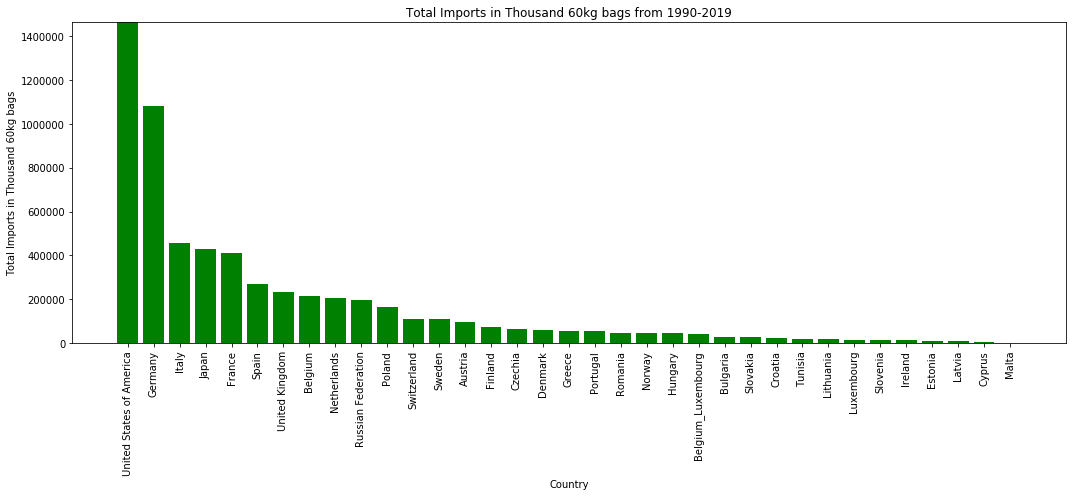

In [199]:
x_axis = total_imports_df_sorted["Country"]
y_axis = total_imports_df_sorted["Total imports 1990-2019"]
plt.figure(figsize=(15,7))
plt.bar(x_axis, y_axis, color='green', align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, x_axis, rotation='vertical')
# plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(y_axis)+1)
plt.xlabel("Country")
plt.ylabel("Total Imports in Thousand 60kg bags")
plt.title("Total Imports in Thousand 60kg bags from 1990-2019")
plt.tight_layout()
plt.gcf
plt.savefig("Images/Fig1ImportsTotal.png", dpi=100)
plt.show()

### Plots together

Text(0.5, 0.98, 'Exports and Price to Growers')

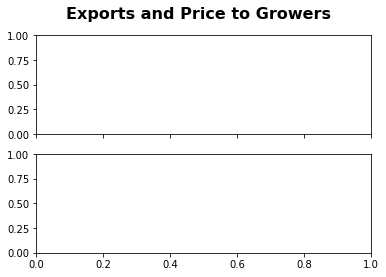

In [200]:
fig, (ax1, ax2) = plt.subplots(2, sharex=True)
fig.suptitle("Exports and Price to Growers", fontsize=16, fontweight="bold")



### Export Plots

In [201]:
exports_df["Total exports 1990-2019"] = exports_df.sum(axis = 1)
exports_df.head()

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2012,2013,2014,2015,2016,2017,2018,2019,Total_exports_per_Country,Total exports 1990-2019
0,Angola,84.3500,70.501000,80.250000,38.878000,8.3020,40.559000,51.831000,50.494000,53.929000,...,8.375000,5.520000,9.375000,10.515000,10.945000,9.055000,9.323397,23.357178,722.707575,1.445415e+03
1,Bolivia (Plurinational State of),156.4420,73.523000,96.204000,47.319000,84.3210,93.958000,123.445000,110.955000,97.039000,...,62.675780,54.850533,61.751267,30.280158,22.456342,26.119992,22.459634,20.341955,2293.482357,4.586965e+03
2,Brazil,16935.7876,21182.761402,18790.719202,17837.747999,17273.1476,14468.432201,15250.609002,16801.260005,18144.388334,...,28549.425891,31650.562945,37335.172825,37562.846747,34269.150253,30924.567849,35637.358589,40697.863709,786432.338399,1.572865e+06
3,Burundi,584.7730,687.851000,645.858000,417.609000,507.8030,528.202000,224.076000,528.764000,373.841000,...,392.006917,194.715883,252.178000,230.188550,204.270831,168.876264,201.725236,292.887291,10768.268964,2.153654e+04
4,Cameroon,2611.2590,1752.179000,1645.851000,704.530000,545.8890,407.269000,563.549000,1368.030000,745.718000,...,621.812800,271.949217,375.033867,390.142717,281.128967,245.017117,287.415250,249.902400,23332.237134,4.666447e+04


In [202]:
total_exports_df_sorted = exports_df.sort_values(by=["Total exports 1990-2019"], ascending=False)
total_exports_df_sorted.head()

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2012,2013,2014,2015,2016,2017,2018,2019,Total_exports_per_Country,Total exports 1990-2019
2,Brazil,16935.787600,21182.761402,18790.719202,17837.747999,17273.147600,14468.432201,15250.609002,16801.260005,18144.388334,...,28549.425891,31650.562945,37335.172825,37562.846747,34269.150253,30924.567849,35637.358589,40697.863709,786432.338399,1.572865e+06
51,Viet Nam,1145.234001,1200.952000,1937.611000,2071.837000,2720.911000,3546.405000,3779.415000,6177.834000,6466.712000,...,22919.663832,19717.764414,26097.144160,21943.502175,29721.290533,25092.158683,31385.065579,27400.161817,415409.004292,8.308180e+05
6,Colombia,13943.870000,12599.184998,16564.370001,13568.362004,11768.089000,9814.197000,10588.430998,10918.863002,11259.928999,...,7170.203291,9669.907367,10954.408357,12716.384670,12831.390727,12984.595747,12807.972625,13672.225599,331310.995174,6.626220e+05
25,Indonesia,6903.226999,6170.796000,4603.696000,5662.094001,4604.629999,3946.585001,6440.280000,5755.078000,5598.031999,...,8205.740826,9254.807331,6174.809713,8378.687596,6545.392045,8197.573974,4538.839055,6333.872889,176797.246233,3.535945e+05
24,India,1979.147999,1727.358999,1816.341000,2101.593000,2496.085000,2467.257001,3103.176000,2640.111001,3486.830003,...,5043.961929,5032.638529,5130.914270,5262.293887,6086.119737,6541.501049,5967.224604,6027.861152,115566.531524,2.311331e+05


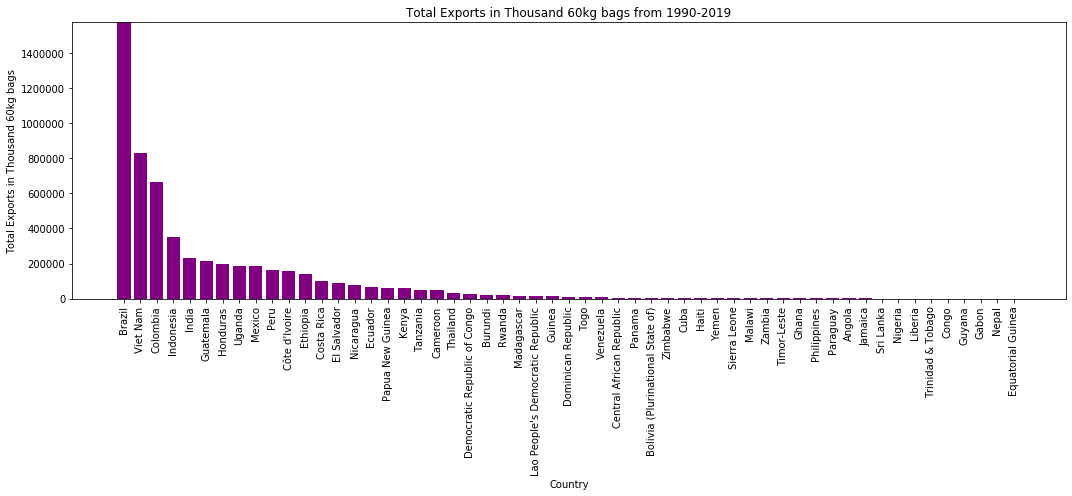

In [203]:
x_axis = total_exports_df_sorted["Country"]
y_axis = total_exports_df_sorted["Total exports 1990-2019"]
plt.figure(figsize=(15,7))
plt.bar(x_axis, y_axis, color='purple', align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, x_axis, rotation='vertical')
# plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(y_axis)+1)
plt.xlabel("Country")
plt.ylabel("Total Exports in Thousand 60kg bags")
plt.title("Total Exports in Thousand 60kg bags from 1990-2019")
plt.tight_layout()
plt.gcf
plt.savefig("Images/Fig2ExportsTotal.png", dpi=100)
plt.show()

### Prices paid to growers plots

In [204]:
prices_paid_to_growers_df["Mean price paid to grower 1990-2019"] = prices_paid_to_growers_df.mean(axis = 1)
prices_paid_to_growers_df.head()

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Mean price paid to grower 1990-2019
0,Colombia,69.5230,67.1251,54.5709,50.1234,85.9942,99.6231,93.5556,133.1672,102.0805,...,239.6763,166.6921,113.9086,159.7125,119.4042,123.5571,125.7612,113.5179,108.6836,104.017283
1,Kenya,60.5721,50.6778,28.9495,47.6419,152.6058,140.1651,110.0360,183.9967,179.8972,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,46.062263
2,Tanzania,40.8183,49.5039,49.1581,38.2833,62.1553,86.7599,62.5345,118.5236,90.7025,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,34.673103
3,Bolivia (Plurinational State of),51.7802,52.4230,43.5276,27.3283,79.9150,76.9867,57.1799,100.0689,131.0938,...,0.0000,225.6445,201.9723,239.2465,234.7937,271.7944,471.6169,455.1460,858.2941,125.185743
4,Burundi,58.0195,55.0206,59.2340,58.2708,60.6823,56.6854,51.9721,52.7855,52.2187,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,38.223777


In [205]:
prices_paid_to_growers_df_sorted = prices_paid_to_growers_df.sort_values(by=["Mean price paid to grower 1990-2019"], ascending=False)
prices_paid_to_growers_df_sorted.head()

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Mean price paid to grower 1990-2019
16,Jamaica,171.5513,227.4241,182.5115,255.5350,290.5986,284.2448,332.1091,286.7807,215.4499,...,302.6948,301.4442,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,196.272943
7,Cuba,171.4282,171.4282,179.9996,188.5711,203.5302,188.6010,188.5711,188.5711,188.5711,...,70.7141,70.7141,221.9638,235.7138,235.7138,235.7138,235.7138,0.0000,0.0000,145.654103
3,Bolivia (Plurinational State of),51.7802,52.4230,43.5276,27.3283,79.9150,76.9867,57.1799,100.0689,131.0938,...,0.0000,225.6445,201.9723,239.2465,234.7937,271.7944,471.6169,455.1460,858.2941,125.185743
9,Dominican Republic,66.0550,62.6429,46.5612,53.1235,112.2640,109.2636,87.6710,166.4135,95.2485,...,191.0669,147.8066,140.9774,183.5634,171.0080,177.1862,173.3619,153.6147,148.2620,108.479207
0,Colombia,69.5230,67.1251,54.5709,50.1234,85.9942,99.6231,93.5556,133.1672,102.0805,...,239.6763,166.6921,113.9086,159.7125,119.4042,123.5571,125.7612,113.5179,108.6836,104.017283


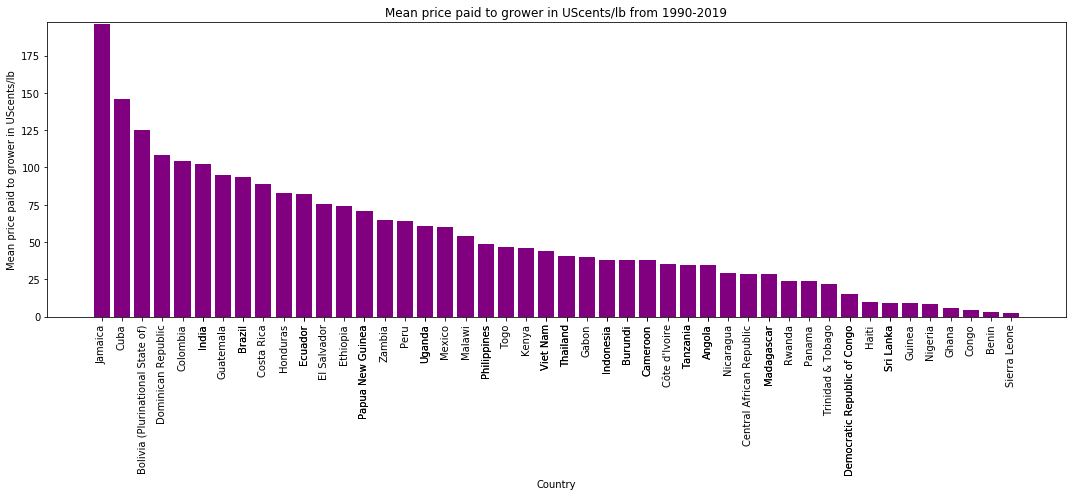

In [206]:
x_axis = prices_paid_to_growers_df_sorted["Country"]
y_axis = prices_paid_to_growers_df_sorted["Mean price paid to grower 1990-2019"]
plt.figure(figsize=(15,7))
plt.bar(x_axis, y_axis, color='purple', align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, x_axis, rotation='vertical')
# plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(y_axis)+1)
plt.xlabel("Country")
plt.ylabel("Mean price paid to grower in UScents/lb")
plt.title("Mean price paid to grower in UScents/lb from 1990-2019")
plt.tight_layout()
plt.gcf
plt.savefig("Images/Fig3MeanPricePaidTogrowers.png", dpi=100)
plt.show()

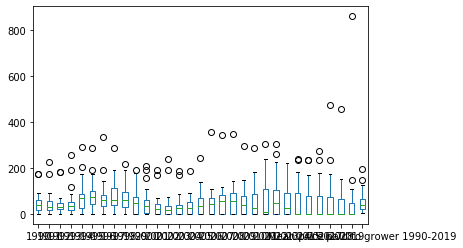

In [207]:
prices_paid_to_growers_df.plot(kind='box')

### Retail_prices plots

In [208]:
retail_prices_df["Mean retail price 1990-2019"] = retail_prices_df.mean(axis = 1)
retail_prices_df.head()

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Mean retail price 1990-2019
0,Austria,4.90,4.57,4.99,4.97,4.58,5.18,5.42,4.37,3.97,...,8.32,8.38,8.62,8.63,7.44,5.64,6.22,6.63,6.166070,5.272536
1,Belgium,3.27,2.92,3.05,2.78,3.42,4.88,4.04,3.98,4.19,...,6.48,6.20,6.24,0.00,0.00,0.00,0.00,0.00,0.000000,3.365667
2,Bulgaria,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,4.16,3.44,3.59,3.75,3.45,3.79,4.64,4.58,4.208544,2.139285
3,Cyprus,2.83,2.80,2.87,2.60,3.18,4.26,4.13,4.04,4.61,...,6.06,6.36,6.47,6.48,5.30,5.30,5.50,5.79,5.393971,4.750466
4,Czechia,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4.31,5.10,...,6.58,7.13,7.00,6.61,5.75,6.14,6.58,7.27,6.697826,3.898594


In [209]:
retail_prices_df_sorted = retail_prices_df.sort_values(by=["Mean retail price 1990-2019"], ascending=False)
retail_prices_df_sorted.head()

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Mean retail price 1990-2019
26,United Kingdom,10.55,10.41,10.09,8.44,11.36,13.79,13.35,14.90,15.42,...,19.02,19.20,18.92,20.56,18.91,16.29,17.01,18.40,17.553314,15.009110
14,Malta,0.00,0.00,0.00,0.00,0.00,7.80,11.95,12.20,10.03,...,14.81,14.15,14.99,14.93,12.80,13.33,14.05,15.15,14.267751,9.885925
22,Japan,10.26,11.88,12.62,14.57,14.69,17.72,15.24,14.22,13.52,...,7.35,7.57,6.05,5.68,5.60,6.21,5.95,5.80,5.711998,9.593400
10,Italy,5.31,5.62,5.86,4.59,4.68,5.70,5.92,5.45,5.53,...,8.52,8.49,8.99,8.85,7.48,7.45,7.67,8.12,7.313802,6.461793
0,Austria,4.90,4.57,4.99,4.97,4.58,5.18,5.42,4.37,3.97,...,8.32,8.38,8.62,8.63,7.44,5.64,6.22,6.63,6.166070,5.272536


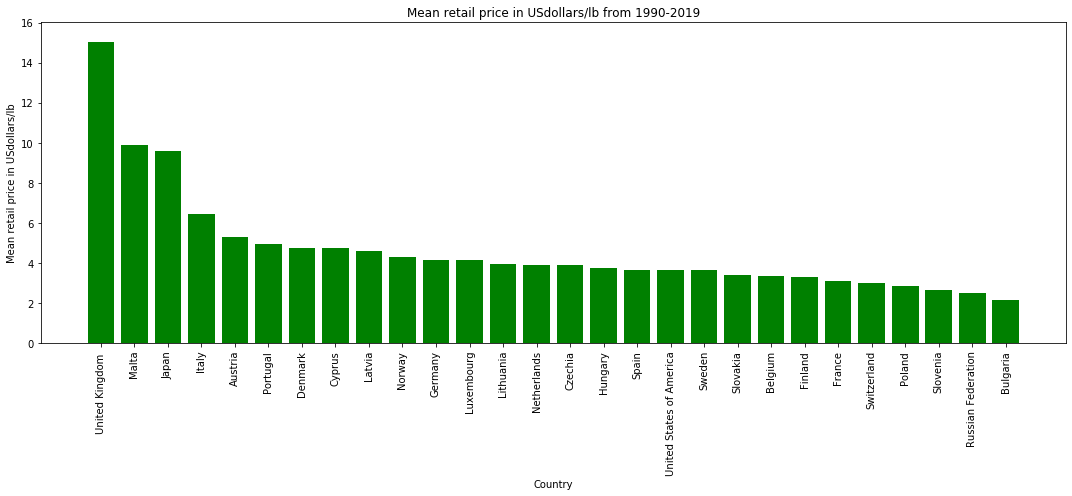

In [210]:
x_axis = retail_prices_df_sorted["Country"]
y_axis = retail_prices_df_sorted["Mean retail price 1990-2019"]
plt.figure(figsize=(15,7))
plt.bar(x_axis, y_axis, color='green', align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, x_axis, rotation='vertical')
# plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(y_axis)+1)
plt.xlabel("Country")
plt.ylabel("Mean retail price in USdollars/lb")
plt.title("Mean retail price in USdollars/lb from 1990-2019")
plt.tight_layout()
plt.gcf
plt.savefig("Images/Fig4MeanRetailPrice.png", dpi=100)
plt.show()

In [211]:
# list(retail_prices_df["Country"].unique())

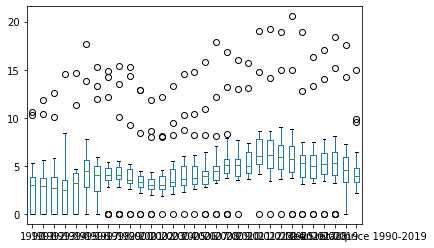

In [212]:
retail_prices_df.plot(kind='box')


### Scatter plots

### List of countries and continent

In [213]:
countries_df = pd.DataFrame().assign(Prices_Paid_to_Growers=prices_paid_to_growers_df["Country"], Exports=exports_df["Country"], Imports=imports_df["Country"], Retail_Prices=retail_prices_df["Country"],)
countries_df

,Prices_Paid_to_Growers,Exports,Imports,Retail_Prices
0,Colombia,Angola,Austria,Austria
1,Kenya,Bolivia (Plurinational State of),Belgium,Belgium
2,Tanzania,Brazil,Belgium_Luxembourg,Bulgaria
3,Bolivia (Plurinational State of),Burundi,Bulgaria,Cyprus
4,Burundi,Cameroon,Croatia,Czechia
...,...,...,...,...
57,Thailand,NaN,NaN,NaN
58,Togo,NaN,NaN,NaN
59,Trinidad & Tobago,NaN,NaN,NaN
60,Uganda,NaN,NaN,NaN


In [214]:
exports_list = list(countries_df["Exports"])
# exports_list
cleanedList_exports_list = [x for x in exports_list if str(x) != 'nan']
print(cleanedList_exports_list)

['Angola', 'Bolivia (Plurinational State of)', 'Brazil', 'Burundi', 'Cameroon', 'Central African Republic', 'Colombia', 'Congo', 'Costa Rica', "Côte d'Ivoire", 'Cuba', 'Democratic Republic of Congo', 'Dominican Republic', 'Ecuador', 'El Salvador', 'Equatorial Guinea', 'Ethiopia', 'Gabon', 'Ghana', 'Guatemala', 'Guinea', 'Guyana', 'Haiti', 'Honduras', 'India', 'Indonesia', 'Jamaica', 'Kenya', "Lao People's Democratic Republic", 'Liberia', 'Madagascar', 'Malawi', 'Mexico', 'Nepal', 'Nicaragua', 'Nigeria', 'Panama', 'Papua New Guinea', 'Paraguay', 'Peru', 'Philippines', 'Rwanda', 'Sierra Leone', 'Sri Lanka', 'Tanzania', 'Thailand', 'Timor-Leste', 'Togo', 'Trinidad & Tobago', 'Uganda', 'Venezuela', 'Viet Nam', 'Yemen', 'Zambia', 'Zimbabwe']


In [215]:
# import pycountry_convert as pc

In [216]:
# from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2

# continents = {
#     'NA': 'North America',
#     'SA': 'South America', 
#     'AS': 'Asia',
#     'OC': 'Australia',
#     'AF': 'Africa',
#     'EU': 'Europe'
# }

# countries = ['Angola', 'Bolivia (Plurinational State of)', 'Brazil', 'Burundi', 'Cameroon', 'Central African Republic', 'Colombia', 'Congo', 'Costa Rica', "Côte d'Ivoire", 'Cuba', 'Democratic Republic of Congo', 'Dominican Republic', 'Ecuador', 'El Salvador', 'Equatorial Guinea', 'Ethiopia', 'Gabon', 'Ghana', 'Guatemala', 'Guinea', 'Guyana', 'Haiti', 'Honduras', 'India', 'Indonesia', 'Jamaica', 'Kenya', "Lao People's Democratic Republic", 'Liberia', 'Madagascar', 'Malawi', 'Mexico', 'Nepal', 'Nicaragua', 'Nigeria', 'Panama', 'Papua New Guinea', 'Paraguay', 'Peru', 'Philippines', 'Rwanda', 'Sierra Leone', 'Sri Lanka', 'Tanzania', 'Thailand', 'Timor-Leste', 'Togo', 'Trinidad & Tobago', 'Uganda', 'Venezuela', 'Viet Nam', 'Yemen', 'Zambia', 'Zimbabwe']

# [continents[country_alpha2_to_continent_code(country_name_to_country_alpha2(country))] for country in countries]

In [217]:
imports_list = list(countries_df["Imports"])
# exports_list
cleanedList_imports_list = [x for x in imports_list if str(x) != 'nan']
print(cleanedList_imports_list)

['Austria', 'Belgium', 'Belgium_Luxembourg', 'Bulgaria', 'Croatia', 'Cyprus', 'Czechia', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands', 'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Japan', 'Norway', 'Russian Federation', 'Switzerland', 'Tunisia', 'United Kingdom', 'United States of America']


In [218]:
Prices_Paid_to_Growers_list = list(countries_df["Prices_Paid_to_Growers"])
# exports_list
cleanedList_Prices_Paid_to_Growers_list = [x for x in Prices_Paid_to_Growers_list if str(x) != 'nan']
print(cleanedList_Prices_Paid_to_Growers_list)

['Colombia', 'Kenya', 'Tanzania', 'Bolivia (Plurinational State of)', 'Burundi', 'Cameroon', 'Costa Rica', 'Cuba', 'Democratic Republic of Congo', 'Dominican Republic', 'Ecuador', 'El Salvador', 'Guatemala', 'Haiti', 'Honduras', 'India', 'Jamaica', 'Madagascar', 'Malawi', 'Mexico', 'Nicaragua', 'Panama', 'Papua New Guinea', 'Peru', 'Rwanda', 'Sri Lanka', 'Uganda', 'Zambia', 'Angola', 'Brazil', 'Ethiopia', 'Indonesia', 'Philippines', 'Thailand', 'Viet Nam', 'Angola', 'Benin', 'Brazil', 'Burundi', 'Cameroon', 'Central African Republic', 'Congo', "Côte d'Ivoire", 'Democratic Republic of Congo', 'Ecuador', 'Gabon', 'Ghana', 'Guinea', 'India', 'Indonesia', 'Madagascar', 'Nigeria', 'Papua New Guinea', 'Philippines', 'Sierra Leone', 'Sri Lanka', 'Tanzania', 'Thailand', 'Togo', 'Trinidad & Tobago', 'Uganda', 'Viet Nam']


In [219]:
Retail_Prices_list = list(countries_df["Retail_Prices"])
# exports_list
cleanedList_Retail_Prices_list = [x for x in Retail_Prices_list if str(x) != 'nan']
print(cleanedList_Retail_Prices_list)

['Austria', 'Belgium', 'Bulgaria', 'Cyprus', 'Czechia', 'Denmark', 'Finland', 'France', 'Germany', 'Hungary', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands', 'Poland', 'Portugal', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Japan', 'Norway', 'Russian Federation', 'Switzerland', 'United Kingdom ', 'United States of America']


### Joining csv files

In [220]:
# imports_merged_df= imports_df.append(non_member_imports_df)
# imports_merged_df

In [221]:
# imports_merged_df['Country'] = imports_merged_df['Country'].apply(lambda country: country.strip())

In [222]:
# imports_retail_prices_merged_df= pd.merge(imports_df, retail_prices_df, on=["Country","Year"], how='left')
# imports_retail_prices_merged_df

In [223]:
# country_df = imports_retail_prices_exports_growers_prices_merged_df.loc[imports_retail_prices_exports_growers_prices_merged_df["Country"] == "Austria", :]
# country_df

In [224]:
# imports_retail_prices_exports_merged_df= pd.merge(imports_retail_prices_merged_df, exports_df, on=["Country", "Year"], how='outer')
# imports_retail_prices_exports_merged_df

In [225]:
# imports_retail_prices_exports_growers_prices_merged_df= pd.merge(imports_retail_prices_exports_merged_df, prices_paid_to_growers_df, on=["Country", "Year"], how='outer')
# imports_retail_prices_exports_growers_prices_merged_df

In [226]:
# # Export the DataFrame as a CSV file. 
# imports_retail_prices_exports_growers_prices_merged_df.to_csv(("Resources/coffee_data.csv"))

### Exploring coffee dataset

In [227]:
imports_retail_prices_exports_growers_prices_merged_df.info()

NameError: name 'imports_retail_prices_exports_growers_prices_merged_df' is not defined

In [ ]:
imports_retail_prices_exports_growers_prices_merged_df.describe()

In [ ]:
# country_df = imports_retail_prices_exports_growers_prices_merged_df.loc[imports_retail_prices_exports_growers_prices_merged_df["Country"] == "Austria", :]
# country_df


In [ ]:
# country_df = imports_exports_growers_retail_merged_df.loc[imports_exports_growers_retail_merged_df["Country"] == "Angola", :]
# country_df.head(50)

### Get latitude and longitude for each Country from all 5 Dataframes
### Installed geopy

In [ ]:
# # Import dependencies
# from geopy.exc import GeocoderTimedOut
# from geopy.geocoders import Nominatim

In [ ]:
# # Create a list of Countries in the imports data (will have to delete final row as a total title not a Country)
# imports_country_list = imports_df.Country.values.tolist()
# imports_country_list
# data = {'Country': (imports_country_list)}
# # print(data)
# imports_country_list_df = pd.DataFrame(data)
# imports_country_list_df = imports_country_list_df.drop([35])
# imports_country_list_df

In [ ]:
# # declare an empty list to store latitude and longitude of values from the Country column
# longitude = []
# latitude = []

# # function to find the coordinate of a given Country
# def findGeocode(Country):
       
#     # try and catch is used to overcome the exception thrown by geolocator using geocodertimedout  
#     try:
#         # Specify the user_agent as your app name
#         geolocator = Nominatim(user_agent="your_app_name")
#         return geolocator.geocode(Country)
    
#     except GeocoderTimedOut:
#         return findGeocode(Country) 
    
#     # each value from Country column will be fetched and sent to function find_geocode   
# for i in (imports_country_list_df["Country"]):
      
#     if findGeocode(i) != None:
           
#         loc = findGeocode(i)
          
#         # coordinates returned from function is stored into two separate lists
#         latitude.append(loc.latitude)
#         longitude.append(loc.longitude)
       
#     # if coordinate for a city not found, insert "NaN" indicating missing value 
#     else:
#         latitude.append(np.nan)
#         longitude.append(np.nan)    

# # Add columns to dataframe
# imports_country_list_df["Longitude"] = longitude
# imports_country_list_df["Latitude"] = latitude
  
# imports_country_list_df

In [ ]:
# # Create a list of Non_member Countries in the imports data (will have to delete last 8 rows as a total row as well as region rows)
# non_member_imports_country_list = non_member_imports_df.Country.values.tolist()
# non_member_imports_country_list
# data = {'Country': (non_member_imports_country_list)}
# # print(data)
# non_member_imports_country_list_df = pd.DataFrame(data)
# non_member_imports_country_list_df = non_member_imports_country_list_df.drop([109,110,111,112,113,114,115,116])
# non_member_imports_country_list_df

In [ ]:
# # Create a list of Countries in the exports data (will have to delete the last row as a total row)
# exports_country_list = exports_df.Country.values.tolist()
# exports_country_list
# data = {'Country': (exports_country_list)}
# # print(data)
# exports_country_list_df = pd.DataFrame(data)
# exports_country_list_df = exports_country_list_df.drop(55)
# exports_country_list_df

In [ ]:
# # Create a list of Countries in the Prices_Paid_to_Growers data 
# prices_paid_to_growers_country_list = prices_paid_to_growers_df.Country.values.tolist()
# prices_paid_to_growers_country_list
# data = {'Country': (prices_paid_to_growers_country_list)}
# # print(data)
# prices_paid_to_growers_country_list_df = pd.DataFrame(data)
# prices_paid_to_growers_country_list_df

In [ ]:
# # Create a list of Countries in the Prices_Paid_to_Growers data 
# retail_prices_country_list = retail_prices_df.Country.values.tolist()
# retail_prices_country_list
# data = {'Country': (retail_prices_country_list)}
# # print(data)
# retail_prices_country_list_df = pd.DataFrame(data)
# retail_prices_country_list_df


### Code blocks below were originally used to clean data then I was encouraged to just clean in excel.

In [ ]:
# imports_df = imports_df.drop(labels=[0,1,3,33,41,43,44], axis =0)
# imports_df


In [ ]:
# header = imports_df.iloc[0]
# imports_df = imports_df[1:]
# imports_df.columns = header
# imports_df=imports_df.rename(columns={"Calendar years":"Country"})
# # imports_df=imports_df.set_index('Country')
# imports_df

In [ ]:
# imports_df.rename(columns = {"1990.0":"1990", "1991.0":"1991", "1992.0":"1992", "1993.0":"1993", "1994.0":"1994", "1995.0":"1995", "1996.0":"1996", "1997.0":"1997", "1998.0":"1998", "1999.0":"1999", "2000.0":"2000", "2001.0":"2001", "2002.0":"2002", "2003.0":"2003", "2004.0":"2004", "2005.0":"2005", "2006.0":"2006", "2007.0":"2007", "2008.0":"2008", "2009.0":"2009", "2010.0":"2010", "2011.0":"2011", "2012.0":"2012", "2013.0":"2013", "2014.0":"2014", "2015.0":"2015", "2016.0":"2016", "2017.0":"2017", "2018.0":"2018", "2019.0":"2019"}, inplace=True)
# imports_df

In [ ]:
# imports_df.info()

In [ ]:
# imports_df.describe()

In [ ]:
# # Collect the mean coffee import volume by year
# mean_coffee_import_volume = imports_df.mean()

# # Collect the years where data was collected
# years = mean_coffee_import_volume.keys()

In [ ]:
# # Plot the mean coffee import volume by year as a line chart
# imports = plt.plot(years, mean_coffee_import_volume, color="blue", label="Coffee Import Average Volume per Year" )


# # Create a legend for our chart
# plt.legend(handles=[imports], loc ="best")

# # Show the chart
# plt.show()

In [ ]:
# imports_df = imports_df.T
# imports_df

In [ ]:
# imports_df[1:].plot(legend=True)
# plt.show

In [ ]:
# imports_df.loc[:0,imports_df.columns != "Country"]

In [ ]:
# imports_df.loc[:0] = imports_df.loc[:0].replace({"1990.0":"1990", "1991.0":"1991", "1992.0":"1992", "1993.0":"1993", "1994.0":"1994", "1995.0":"1995", "1996.0":"1996", "1997.0":"1997", "1998.0":"1998", "1999.0":"1999", "2000.0":"2000", "2001.0":"2001", "2002.0":"2002", "2003.0":"2003", "2004.0":"2004", "2005.0":"2005", "2006.0":"2006", "2007.0":"2007", "2008.0":"2008", "2009.0":"2009", "2010.0":"2010", "2011.0":"2011", "2012.0":"2012", "2013.0":"2013", "2014.0":"2014", "2015.0":"2015", "2016.0":"2016", "2017.0":"2017", "2018.0":"2018", "2019.0":"2019"})
# imports_df

In [ ]:
# imports_df.loc[:0]=pd.to_datetime(imports_df.loc[:0], format = '%Y')
# imports_df


In [ ]:
# Read the 'Imports by selected importing countries' data into a Pandas DataFrame
# non_member_imports_df = pd.read_excel(r'Resources/Non_member_imports.xlsx', engine='openpyxl')

In [ ]:
# non_member_imports_df = non_member_imports_df.drop(labels=[0,1,3,32,80,97,102,118,121,127], axis =0)
# non_member_imports_df=non_member_imports_df.drop(labels=range(129,139), axis=0)
# non_member_imports_df

In [ ]:
# header = non_member_imports_df.iloc[0]
# non_member_imports_df = non_member_imports_df[1:]
# non_member_imports_df.columns = header
# non_member_imports_df=non_member_imports_df.rename(columns={"Calendar years":"Country"})
# # non_member_imports_df=non_member_imports_df.set_index('Country')
# non_member_imports_df

In [ ]:
# non_member_imports_df.info()

In [ ]:
# non_member_imports_df.describe()

In [ ]:
# # Collect the mean coffee import volume by year
# mean_coffee_non_member_import_volume = non_member_imports_df.mean()

# # Collect the years where data was collected
# years = mean_coffee_non_member_import_volume.keys()

In [ ]:
# # Plot the mean coffee import non-member volume by year as a line chart
# imports_non_member = plt.plot(years, mean_coffee_non_member_import_volume, color="green", label="Coffee Import Non_Member Average Volume per Year" )


# # Create a legend for our chart
# plt.legend(handles=[imports_non_member], loc ="best")

# # Show the chart
# plt.show()

In [ ]:
# non_member_imports_df = non_member_imports_df.T
# non_member_imports_df

In [ ]:
# non_member_imports_df[1:].plot(legend=True)
# plt.show

In [ ]:
# # Read the 'Exports of all forms of coffee by all exporting countries' data into a Pandas DataFrame
# exports_df = pd.read_excel(r'Resources/Exports_calendar_year.xlsx', engine='openpyxl')


In [ ]:
# exports_df=exports_df.drop(labels=[0,1,58,60], axis =0)
# exports_df

In [ ]:
# header = exports_df.iloc[0]
# exports_df = exports_df[1:]
# exports_df.columns = header
# exports_df=exports_df.rename(columns={"Calendar years":"Country"})
# # exports_df=exports_df.set_index('Country')
# exports_df

In [ ]:
# exports_df.info()

In [ ]:
# exports_df.describe()

In [ ]:
# # Collect the mean coffee export volume by year
# export_volume = exports_df.mean()

# # Collect the years where data was collected
# years = export_volume.keys()

In [ ]:
# # Plot the mean coffee export volume by year as a line chart
# exports = plt.plot(years, export_volume, color="green", label="Coffee Export Volume per Year" )


# # Create a legend for our chart
# plt.legend(handles=[exports], loc ="best")

# # Show the chart
# plt.show()

In [ ]:
# exports_df = exports_df.T
# exports_df

In [ ]:
# exports_df[1:].plot(legend=True)
# plt.show

In [ ]:
# # Read the 'Prices paid to growers in exporting countries' data into a Pandas DataFrame
# prices_paid_to_growers_df = pd.read_excel(r'Resources/Prices_paid_to_growers.xlsx', engine='openpyxl')


In [ ]:
# prices_paid_to_growers_df=prices_paid_to_growers_df.drop(labels=[0,1,3,8,37,46], axis =0)
# prices_paid_to_growers_df=prices_paid_to_growers_df.drop(labels=range(76,103), axis=0)
# prices_paid_to_growers_df

In [ ]:
# header = prices_paid_to_growers_df.iloc[0]
# prices_paid_to_growers_df = prices_paid_to_growers_df[1:]
# prices_paid_to_growers_df.columns = header
# prices_paid_to_growers_df=prices_paid_to_growers_df.rename(columns={"Calendar years":"Country"})
# # prices_paid_to_growers_df=prices_paid_to_growers_df.set_index('Country')
# prices_paid_to_growers_df

In [ ]:
# prices_paid_to_growers_df.info()

In [ ]:
# prices_paid_to_growers_df.describe()

In [ ]:
# # Collect the prices paid to growers mean by year
# prices_paid_to_growers = prices_paid_to_growers_df.mean()

# # Collect the years where data was collected
# years = prices_paid_to_growers.keys()

In [ ]:
# # Plot the prices paid to growers mean by year as a line chart
# growers_prices = plt.plot(years, prices_paid_to_growers, color="green", label="Prices Paid to Growers Mean by Year")


# # Create a legend for our chart
# plt.legend(handles=[growers_prices], loc ="best")

# # Show the chart
# plt.show()

In [ ]:
# prices_paid_to_growers_df = prices_paid_to_growers_df.T
# prices_paid_to_growers_df

In [ ]:
# prices_paid_to_growers_df[1:].plot
# plt.show

In [ ]:
# # Read the 'Retail prices of roasted coffee in selected importing countries' data into a Pandas DataFrame
# retail_prices_df = pd.read_excel(r'Resources/Retail_prices.xlsx', engine='openpyxl')


In [ ]:
# retail_prices_df=retail_prices_df.drop(labels=[0,1,3,27], axis =0)
# retail_prices_df=retail_prices_df.drop(labels=range(34,74), axis=0)
# retail_prices_df

In [ ]:
# header = retail_prices_df.iloc[0]
# retail_prices_df = retail_prices_df[1:]
# retail_prices_df.columns = header
# retail_prices_df=retail_prices_df.rename(columns={"Calendar years":"Country"})
# # retail_prices_df=retail_prices_df.set_index('Country')
# retail_prices_df

In [ ]:
# retail_prices_df.info()

In [ ]:
# retail_prices_df.describe()

In [ ]:
# # Collect the retail prices mean by year
# retail_prices = retail_prices_df.mean()

# # Collect the years where data was collected
# years = retail_prices.keys()

In [ ]:
# # Plot the retail prices mean by year as a line chart
# retail = plt.plot(years, retail_prices, color="green", label="Retail Prices Mean by Year")


# # Create a legend for our chart
# plt.legend(handles=[retail], loc ="best")

# # Show the chart
# plt.show()

In [ ]:
# retail_prices_df = retail_prices_df.T
# retail_prices_df

In [ ]:
# retail_prices_df[1:].plot
# plt.show